# Generalities for DAEs and VAEs

* Import libraries
* Run on GPU if possible
* Create data loaders

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from IPython.display import Image, display
import matplotlib.pyplot as plt

# create directory to save results
!mkdir results

# script parameters
batch_size = 128
log_interval = 100

# run on GPU if possible
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

# create data loaders
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

mkdir: cannot create directory ‘results’: File exists


# Neural Network classes

* Deterministic auto-encoder (DAE)
* Variational auto-encoder (VAE)


In [ ]:
# Deterministic Auto-Encoder (DAE)
class DAE(nn.Module):

    # declare layers
    def __init__(self):
        super(DAE, self).__init__()
        self.fc1 = nn.Linear(784, 400)
        self.fc2 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)

    # encoder: one ReLU hidden layer of 400 nodes, one Linear output layer of 20 nodes
    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h)

    # decoder: one ReLU hidden layer of 400 nodes, one sigmoid output layer of 784 nodes
    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    # forward: encoder followed by decoder
    def forward(self, x):
        z = self.encode(x.view(-1, 784))
        return self.decode(z)

# Variational Auto-Encoder (VAE)     
class VAE(nn.Module):

    # declare layers
    def __init__(self):
        super(VAE, self).__init__()

        # dummy assignment until this function is filled in
        self.fc1 = nn.Linear(784, 400)
        self.fc2 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(400, 20)
        self.fc4 = nn.Linear(20,400)
        self.fc5 = nn.Linear(400,784)


    # Encoder: one ReLU hidden layer of 400 nodes, two Linear output layers of 20 nodes (means and log_variances)
    # Input: image (array of size 784)
    # Output: means (array of size 20), log_variances (array of size 20)
    def encode(self, x):
        # dummy assignment until this function is filled in
        means = torch.randn(x.shape[0], 20).to(device)
        log_variances = torch.randn(x.shape[0], 20).to(device)
        h = F.relu(self.fc1(x))
        means = self.fc2(h)
        log_variances = self.fc3(h)
        return means, log_variances

    # Reparameterization:
    #
    # Let eps be samples from a Normal(0,1)
    # Input: means (array of size 20), log_variances (array of size 20)
    # Output: embedding (array of size 20 corresponding to means + eps * exponential(log_variances/2))
    def reparameterize(self, means, log_variances):

        # dummy assignment until this function is filled in
        embedding = torch.randn(means.shape[0], 20).to(device)
        eps = torch.randn_like(means).to(device)
        embedding = means + (eps * torch.exp(log_variances/2))
        return embedding

    # Decoder: one ReLU hidden layer of 400 nodes, one sigmoid output layer of 784 nodes
    # Input: embedding (array of size 20)
    # Output: probability of reconstructed image (array of size 784)
    def decode(self, z):

        # dummy assignment until this function is filled in
        probabilties = torch.rand(z.shape[0],784).to(device)
        h3 = F.relu(self.fc4(z))
        probabilties = torch.sigmoid(self.fc5(h3))
        return probabilties

    # Function forward: encoder, reparameterize, decoder
    # Input: image
    # Output: probability of reconstructed image, means, log_variances
    def forward(self, x):

        # dummy assignment until this function is filled in
        # probabilties = torch.rand(x.shape[0],20).to(device)
        means = torch.randn(x.shape[0], 20).to(device)
        log_variances = torch.randn(x.shape[0], 20).to(device)
        means, log_variances = self.encode(x.view(-1,784))
        # print(means, log_variances)
        embedding = self.reparameterize(means, log_variances)
        # print(embedding)
        probabilties = self.decode(embedding)
        return probabilties, means, log_variances

# Loss Functions

In [ ]:
# DAE Loss Function
# Reconstruction loss: binary cross entropy
#
# Inputs:
#    reconstructed_x: reconstructed image
#    x: image
#
# Output:
#    BCE: binary cross entropy  
#
def dae_loss_function(reconstructed_x, x):
    BCE = F.binary_cross_entropy(reconstructed_x, x.view(-1, 784), reduction='sum')
    return BCE

# VAE Loss Function
# Reconstruction loss: binary cross entropy
# KL divergence loss: -0.5 * sum(1 + log_variances - means^2 - exp(log_variances))
#       see Appendix B from VAE paper:
#       Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
#       https://arxiv.org/abs/1312.6114
#
# Inputs: 
#    reconstructed_x: reconstructed image
#    x: image
#    means: array of size 20
#    log_variances: array of size 20
#
# Outputs:
#    total_loss: binary cross entropy + KL divergence (scalar)
#    BCE: binary cross entropy (scalar)
#
def vae_loss_function(reconstructed_x, x, means, log_variances):

    # dummy assignment until this function is filled in
    total_loss = 0
    BCE = 0
    t = 1 + log_variances - torch.square(means) - torch.exp(log_variances)
    KLDivergenceLoss = -0.5*torch.sum(t)
    BCE = F.binary_cross_entropy(reconstructed_x, x.view(-1, 784), reduction='sum')
    total_loss = BCE + KLDivergenceLoss
    return total_loss, BCE


# Training

In [ ]:
# DAE Training
#
# Inputs:
#    epoch: epoch #
#    model: DAE neural network
#    optimizer: DAE optimizer
#
# Outputs:
#    average_train_BCE: binary cross entropy (scalar)
#
def dae_train(epoch, model, optimizer):
    train_BCE = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch = model(data)
        loss = dae_loss_function(recon_batch, data)
        loss.backward()
        train_BCE += loss.item()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    average_train_BCE = train_BCE / len(train_loader.dataset)
    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, average_train_BCE))
    return average_train_BCE

# VAE Training
#
# Inputs:
#    epoch: epoch #
#    model: VAE neural network
#    optimizer: VAE optimizer
#
# Outputs:
#    average_train_loss: binary cross entropy + KL divergence (scalar)
#    average_train_BCE: binary cross entropy (scalar)
#
def vae_train(epoch, model, optimizer):

    # dummy assignment until this function is filled in
    average_train_loss = 0
    average_train_BCE = 0
    train_loss = 0
    train_BCE = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mean, log_variances = model(data)
        # print(recon_batch)
        total_loss,loss = vae_loss_function(recon_batch, data, mean, log_variances)
        total_loss.backward()
        # loss.backward()
        
        train_BCE += loss.item()
        train_loss += total_loss.item()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tTotal Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data), total_loss.item()/len(data)))

    average_train_BCE = train_BCE / len(train_loader.dataset)
    average_train_loss = train_loss / len(train_loader.dataset)
    print('====> Epoch: {} Average loss: {:.4f} Average loss: {:.4f}'.format(
          epoch, average_train_BCE, average_train_loss))
    return average_train_loss, average_train_BCE



# Testing

In [ ]:
# DAE Test
#
# Inputs:
#    epoch: epoch #
#    model: DAE neural network
#
# Outputs:
#    average_test_BCE: binary cross entropy (scalar)
#
def dae_test(epoch, model):
    model.eval()
    test_BCE = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch = model(data)
            test_BCE += dae_loss_function(recon_batch, data).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(batch_size, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'results/reconstruction_' + str(epoch) + '.png', nrow=n)
                print('Sample of reconstructed images (top row are targets and bottom row are reconstructions)')
                display(Image('results/reconstruction_' + str(epoch) + '.png'))

    average_test_BCE = test_BCE / len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(average_test_BCE))
    return average_test_BCE

# VAE Test
#
# Inputs:
#    epoch: epoch #
#    model: VAE neural network
#
# Outputs:
#    average_test_loss: binary cross entropy + KL divergence (scalar)
#    average_test_BCE: binary cross entropy (scalar)
#
def vae_test(epoch, model):

    # dummy assignment until this function is filled in
    average_test_loss = 0
    average_test_BCE = 0
    model.eval()
    test_BCE = 0
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, mean, log_variances = model(data)
            total_loss, loss = vae_loss_function(recon_batch, data, mean, log_variances)
            test_BCE += loss.item()
            test_loss += total_loss.item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(batch_size, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'results/vae_reconstruction_' + str(epoch) + '.png', nrow=n)
                print('Sample of reconstructed images (top row are targets and bottom row are reconstructions)')
                display(Image('results/vae_reconstruction_' + str(epoch) + '.png'))

    average_test_BCE = test_BCE / len(test_loader.dataset)
    average_test_loss = test_loss / len(test_loader.dataset)
    print('====> Test set BCE : {:.4f}, loss: {:.4f}'.format(average_test_BCE, average_test_loss))
    return average_test_loss, average_test_BCE


# Main

Train Epoch: 1 [0/60000 (0%)]	Loss: 543.477478
Train Epoch: 1 [12800/60000 (21%)]	Loss: 145.913193
Train Epoch: 1 [25600/60000 (43%)]	Loss: 111.198456
Train Epoch: 1 [38400/60000 (64%)]	Loss: 103.737106
Train Epoch: 1 [51200/60000 (85%)]	Loss: 93.925697
====> Epoch: 1 Average loss: 129.0912
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


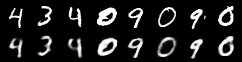

====> Test set loss: 87.2573
Sample of generated images


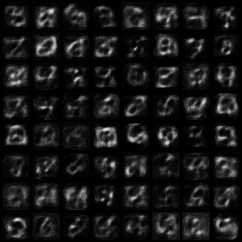



Train Epoch: 2 [0/60000 (0%)]	Loss: 84.661140
Train Epoch: 2 [12800/60000 (21%)]	Loss: 80.962585
Train Epoch: 2 [25600/60000 (43%)]	Loss: 82.598328
Train Epoch: 2 [38400/60000 (64%)]	Loss: 78.673897
Train Epoch: 2 [51200/60000 (85%)]	Loss: 81.635674
====> Epoch: 2 Average loss: 82.4599
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


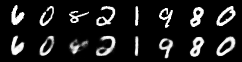

====> Test set loss: 77.8746
Sample of generated images


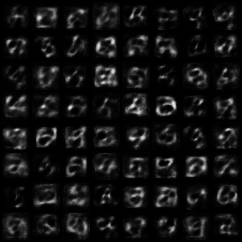



Train Epoch: 3 [0/60000 (0%)]	Loss: 78.846237
Train Epoch: 3 [12800/60000 (21%)]	Loss: 76.680054
Train Epoch: 3 [25600/60000 (43%)]	Loss: 81.180046
Train Epoch: 3 [38400/60000 (64%)]	Loss: 78.533485
Train Epoch: 3 [51200/60000 (85%)]	Loss: 75.772133
====> Epoch: 3 Average loss: 76.8506
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


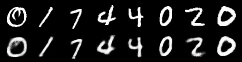

====> Test set loss: 74.4978
Sample of generated images


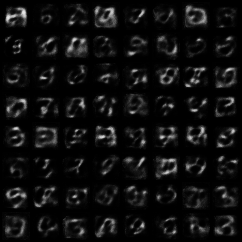



Train Epoch: 4 [0/60000 (0%)]	Loss: 75.296761
Train Epoch: 4 [12800/60000 (21%)]	Loss: 72.840858
Train Epoch: 4 [25600/60000 (43%)]	Loss: 71.425896
Train Epoch: 4 [38400/60000 (64%)]	Loss: 76.433846
Train Epoch: 4 [51200/60000 (85%)]	Loss: 73.282219
====> Epoch: 4 Average loss: 74.1433
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


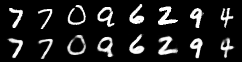

====> Test set loss: 72.6103
Sample of generated images


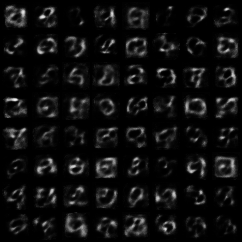



Train Epoch: 5 [0/60000 (0%)]	Loss: 70.013657
Train Epoch: 5 [12800/60000 (21%)]	Loss: 70.529922
Train Epoch: 5 [25600/60000 (43%)]	Loss: 74.031837
Train Epoch: 5 [38400/60000 (64%)]	Loss: 76.500557
Train Epoch: 5 [51200/60000 (85%)]	Loss: 71.563881
====> Epoch: 5 Average loss: 72.3842
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


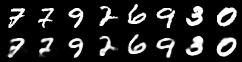

====> Test set loss: 71.1758
Sample of generated images


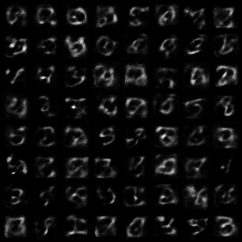



Train Epoch: 6 [0/60000 (0%)]	Loss: 67.956482
Train Epoch: 6 [12800/60000 (21%)]	Loss: 75.010704
Train Epoch: 6 [25600/60000 (43%)]	Loss: 70.448257
Train Epoch: 6 [38400/60000 (64%)]	Loss: 71.386047
Train Epoch: 6 [51200/60000 (85%)]	Loss: 70.611313
====> Epoch: 6 Average loss: 71.1186
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


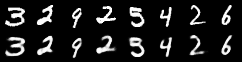

====> Test set loss: 70.3337
Sample of generated images


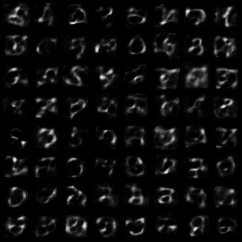



Train Epoch: 7 [0/60000 (0%)]	Loss: 67.948044
Train Epoch: 7 [12800/60000 (21%)]	Loss: 72.401482
Train Epoch: 7 [25600/60000 (43%)]	Loss: 70.098656
Train Epoch: 7 [38400/60000 (64%)]	Loss: 70.775467
Train Epoch: 7 [51200/60000 (85%)]	Loss: 70.097656
====> Epoch: 7 Average loss: 70.1362
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


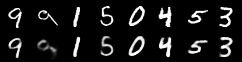

====> Test set loss: 69.4764
Sample of generated images


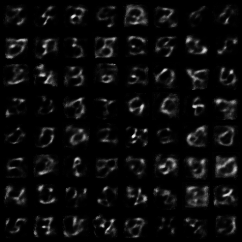



Train Epoch: 8 [0/60000 (0%)]	Loss: 68.103699
Train Epoch: 8 [12800/60000 (21%)]	Loss: 69.859787
Train Epoch: 8 [25600/60000 (43%)]	Loss: 66.786934
Train Epoch: 8 [38400/60000 (64%)]	Loss: 71.140289
Train Epoch: 8 [51200/60000 (85%)]	Loss: 69.758881
====> Epoch: 8 Average loss: 69.3812
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


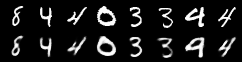

====> Test set loss: 68.7418
Sample of generated images


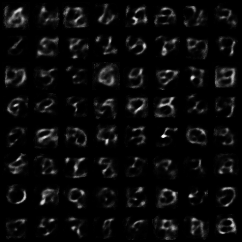



Train Epoch: 9 [0/60000 (0%)]	Loss: 70.356674
Train Epoch: 9 [12800/60000 (21%)]	Loss: 67.893875
Train Epoch: 9 [25600/60000 (43%)]	Loss: 68.116219
Train Epoch: 9 [38400/60000 (64%)]	Loss: 69.921631
Train Epoch: 9 [51200/60000 (85%)]	Loss: 69.658340
====> Epoch: 9 Average loss: 68.7630
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


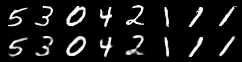

====> Test set loss: 68.3796
Sample of generated images


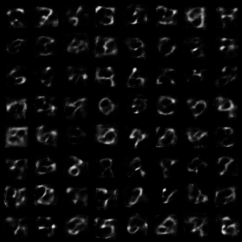



Train Epoch: 10 [0/60000 (0%)]	Loss: 67.197769
Train Epoch: 10 [12800/60000 (21%)]	Loss: 68.886688
Train Epoch: 10 [25600/60000 (43%)]	Loss: 66.321129
Train Epoch: 10 [38400/60000 (64%)]	Loss: 67.001694
Train Epoch: 10 [51200/60000 (85%)]	Loss: 70.446182
====> Epoch: 10 Average loss: 68.2255
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


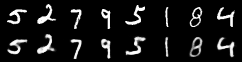

====> Test set loss: 67.9908
Sample of generated images


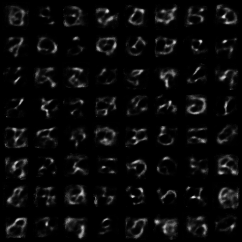

In [ ]:
# train and test DAE
epochs = 10
dae_average_train_BCE = []
dae_average_test_BCE = []
dae_model = DAE().to(device)
dae_optimizer = optim.Adam(dae_model.parameters(), lr=1e-3)
for epoch in range(1, epochs + 1):
    average_train_BCE = dae_train(epoch, dae_model, dae_optimizer)
    dae_average_train_BCE.append(average_train_BCE)
    average_test_BCE = dae_test(epoch, dae_model)
    dae_average_test_BCE.append(average_test_BCE)
    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = dae_model.decode(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/sample_' + str(epoch) + '.png')
        print('Sample of generated images')
        display(Image('results/sample_' + str(epoch) + '.png'))
        print('\n')


Train Epoch: 1 [0/60000 (0%)]	Loss: 551.160889	Total Loss: 551.267273
Train Epoch: 1 [12800/60000 (21%)]	Loss: 173.061188	Total Loss: 183.571701
Train Epoch: 1 [25600/60000 (43%)]	Loss: 132.201447	Total Loss: 148.199615
Train Epoch: 1 [38400/60000 (64%)]	Loss: 118.235245	Total Loss: 136.992523
Train Epoch: 1 [51200/60000 (85%)]	Loss: 110.887932	Total Loss: 131.010025
====> Epoch: 1 Average loss: 147.5375 Average loss: 163.1748
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


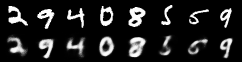

====> Test set BCE : 106.0636, loss: 126.9162
Sample of generated images


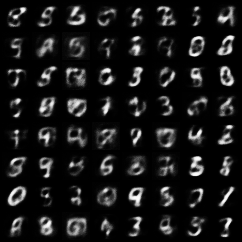



Train Epoch: 2 [0/60000 (0%)]	Loss: 116.829910	Total Loss: 136.979843
Train Epoch: 2 [12800/60000 (21%)]	Loss: 109.620239	Total Loss: 131.495880
Train Epoch: 2 [25600/60000 (43%)]	Loss: 100.048553	Total Loss: 122.537590
Train Epoch: 2 [38400/60000 (64%)]	Loss: 95.284386	Total Loss: 117.886177
Train Epoch: 2 [51200/60000 (85%)]	Loss: 96.171021	Total Loss: 119.517693
====> Epoch: 2 Average loss: 99.4803 Average loss: 121.4730
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


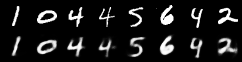

====> Test set BCE : 91.9073, loss: 115.5512
Sample of generated images


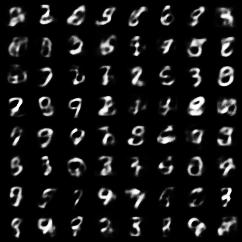



Train Epoch: 3 [0/60000 (0%)]	Loss: 96.272652	Total Loss: 119.092163
Train Epoch: 3 [12800/60000 (21%)]	Loss: 89.657448	Total Loss: 113.556229
Train Epoch: 3 [25600/60000 (43%)]	Loss: 90.375298	Total Loss: 113.690971
Train Epoch: 3 [38400/60000 (64%)]	Loss: 88.187439	Total Loss: 113.192535
Train Epoch: 3 [51200/60000 (85%)]	Loss: 89.096939	Total Loss: 113.721207
====> Epoch: 3 Average loss: 90.7583 Average loss: 114.4840
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


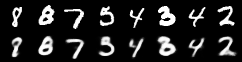

====> Test set BCE : 86.9627, loss: 111.5867
Sample of generated images


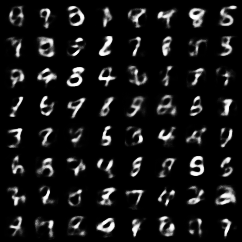



Train Epoch: 4 [0/60000 (0%)]	Loss: 89.312698	Total Loss: 113.589905
Train Epoch: 4 [12800/60000 (21%)]	Loss: 89.399994	Total Loss: 113.611526
Train Epoch: 4 [25600/60000 (43%)]	Loss: 87.731979	Total Loss: 112.596207
Train Epoch: 4 [38400/60000 (64%)]	Loss: 88.250687	Total Loss: 113.152771
Train Epoch: 4 [51200/60000 (85%)]	Loss: 86.860359	Total Loss: 111.460129
====> Epoch: 4 Average loss: 86.9898 Average loss: 111.3718
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


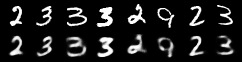

====> Test set BCE : 85.4482, loss: 109.6566
Sample of generated images


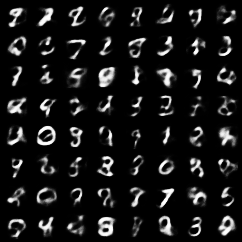



Train Epoch: 5 [0/60000 (0%)]	Loss: 86.067261	Total Loss: 109.965942
Train Epoch: 5 [12800/60000 (21%)]	Loss: 90.629051	Total Loss: 115.447983
Train Epoch: 5 [25600/60000 (43%)]	Loss: 85.663002	Total Loss: 110.104439
Train Epoch: 5 [38400/60000 (64%)]	Loss: 86.574028	Total Loss: 111.464455
Train Epoch: 5 [51200/60000 (85%)]	Loss: 83.624290	Total Loss: 107.699265
====> Epoch: 5 Average loss: 84.9616 Average loss: 109.6223
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


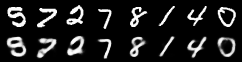

====> Test set BCE : 83.6712, loss: 108.2988
Sample of generated images


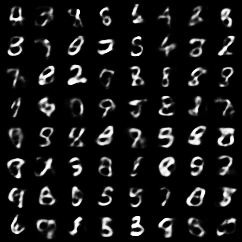



Train Epoch: 6 [0/60000 (0%)]	Loss: 81.177048	Total Loss: 105.599976
Train Epoch: 6 [12800/60000 (21%)]	Loss: 88.323532	Total Loss: 112.559326
Train Epoch: 6 [25600/60000 (43%)]	Loss: 82.957520	Total Loss: 107.945450
Train Epoch: 6 [38400/60000 (64%)]	Loss: 84.494041	Total Loss: 109.515747
Train Epoch: 6 [51200/60000 (85%)]	Loss: 85.089302	Total Loss: 110.021324
====> Epoch: 6 Average loss: 83.5947 Average loss: 108.4376
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


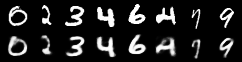

====> Test set BCE : 82.0632, loss: 107.1918
Sample of generated images


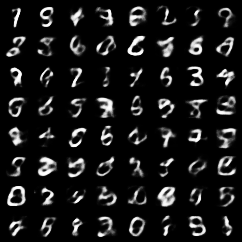



Train Epoch: 7 [0/60000 (0%)]	Loss: 86.272362	Total Loss: 111.930809
Train Epoch: 7 [12800/60000 (21%)]	Loss: 81.448639	Total Loss: 106.153336
Train Epoch: 7 [25600/60000 (43%)]	Loss: 83.641418	Total Loss: 109.149002
Train Epoch: 7 [38400/60000 (64%)]	Loss: 80.144318	Total Loss: 105.585182
Train Epoch: 7 [51200/60000 (85%)]	Loss: 86.025314	Total Loss: 110.616318
====> Epoch: 7 Average loss: 82.6592 Average loss: 107.6366
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


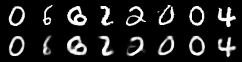

====> Test set BCE : 81.8106, loss: 106.6592
Sample of generated images


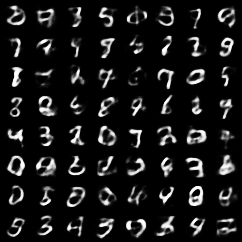



Train Epoch: 8 [0/60000 (0%)]	Loss: 84.963608	Total Loss: 109.863037
Train Epoch: 8 [12800/60000 (21%)]	Loss: 82.419220	Total Loss: 107.674599
Train Epoch: 8 [25600/60000 (43%)]	Loss: 78.484184	Total Loss: 103.895416
Train Epoch: 8 [38400/60000 (64%)]	Loss: 81.728493	Total Loss: 106.977646
Train Epoch: 8 [51200/60000 (85%)]	Loss: 81.991577	Total Loss: 108.335358
====> Epoch: 8 Average loss: 81.8695 Average loss: 106.8980
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


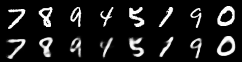

====> Test set BCE : 80.8921, loss: 106.1538
Sample of generated images


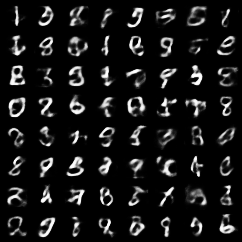



Train Epoch: 9 [0/60000 (0%)]	Loss: 82.118355	Total Loss: 107.253654
Train Epoch: 9 [12800/60000 (21%)]	Loss: 81.784653	Total Loss: 105.613937
Train Epoch: 9 [25600/60000 (43%)]	Loss: 80.376633	Total Loss: 105.255844
Train Epoch: 9 [38400/60000 (64%)]	Loss: 80.035202	Total Loss: 105.071945
Train Epoch: 9 [51200/60000 (85%)]	Loss: 80.260681	Total Loss: 105.085976
====> Epoch: 9 Average loss: 81.3799 Average loss: 106.4957
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


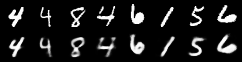

====> Test set BCE : 80.4097, loss: 105.6253
Sample of generated images


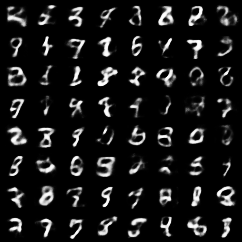



Train Epoch: 10 [0/60000 (0%)]	Loss: 81.353104	Total Loss: 106.658157
Train Epoch: 10 [12800/60000 (21%)]	Loss: 77.904831	Total Loss: 102.815605
Train Epoch: 10 [25600/60000 (43%)]	Loss: 82.492340	Total Loss: 107.689087
Train Epoch: 10 [38400/60000 (64%)]	Loss: 84.243271	Total Loss: 109.478897
Train Epoch: 10 [51200/60000 (85%)]	Loss: 79.842201	Total Loss: 105.003967
====> Epoch: 10 Average loss: 80.8778 Average loss: 106.0400
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


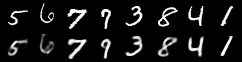

====> Test set BCE : 79.6096, loss: 105.5043
Sample of generated images


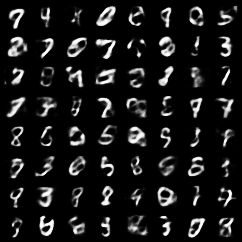

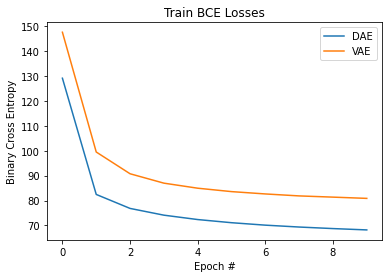

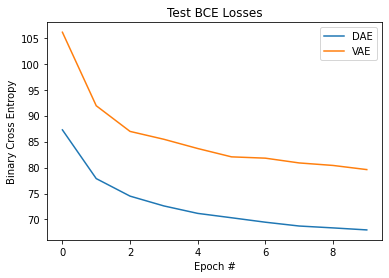

In [ ]:
# train and test VAE
epochs = 10
vae_average_train_losses = []
vae_average_train_BCE = []
vae_average_test_losses = []
vae_average_test_BCE = []
vae_model = VAE().to(device)
vae_optimizer = optim.Adam(vae_model.parameters(), lr=1e-3)
for epoch in range(1, epochs + 1):
    average_train_loss, average_train_BCE = vae_train(epoch, vae_model, vae_optimizer)
    vae_average_train_losses.append(average_train_loss)
    vae_average_train_BCE.append(average_train_BCE)
    average_test_loss, average_test_BCE = vae_test(epoch, vae_model)
    vae_average_test_losses.append(average_test_loss)
    vae_average_test_BCE.append(average_test_BCE)
    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = vae_model.decode(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/vae_sample_' + str(epoch) + '.png')
        print('Sample of generated images')
        display(Image('results/vae_sample_' + str(epoch) + '.png'))
        print('\n')

# Plot Train BCE Losses
plt.plot(dae_average_train_BCE)
plt.plot(vae_average_train_BCE)
plt.title('Train BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['DAE','VAE'], loc='upper right')
plt.show()

# Plot Test BCE Losses
plt.plot(dae_average_test_BCE)
plt.plot(vae_average_test_BCE)
plt.title('Test BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['DAE','VAE'], loc='upper right')
plt.show()

# Discussion

> We see that the **binary cross entropy (BCE) of DAE is much lesser than that of VAE.** That is, DCE is better at reconstruction than VAE. This is because, DAE is a deterministic model, and its objective function is only dependent on the reconstruction loss explained by the binary cross entropy, which would penalize the model if the reconstructed data doesnot closely represent the input. Thus, the reconstructed value would be much better using a DAE model.

> On the other hand, the VAE model is a generative model, that is, it is designed to generate the variations of the input as opposed to replicating the input. Thus, its objective function includes a KL loss along with the BCE. Since, such a model tries to reach an equlibrium between the two loss terms and thus the BCE will not get as optimized as in DAE.

> **In terms of the quality of the sample images generated by both the models, the ones generated by VAE is much better(more realistic though little blurred) than that generated by DAE.** Again this is because, VAE is a generative model, which encodes the input into a hidden space which is continous, enabling smooth interpolation and generation of new samples as oppposed to that of a DAE model, which rather has a relatively discontinous vector space of encodings. Thus, it sampling a variation would result in an unrealistic data.





